# Programming for Data Analysis - Project 2
## An Analysis of Paleo to Present Climate Data

Author: Daniel Mc Donagh

Student ID: G00410864

## Introduction

Debate about earth climate change has been ongoing for decades. Scientific studies done by paleoclimatologists, where evidence gathered from sources such as ice cores taken in the antartic have been used to find evidence of past atmospheric conditions and determine temperatures of the climate at that time have greatly expanded our understanding of past climatic events. Hoever it has also showed trends in recent decades that are worrying at best. Our current rate of increase of carbon dioxide in the atmosphere since the industrial age has far surpassed anything seen on this planet in the last 800,000 years. This research will look to stitch together data taken from studies .

## Data Gathering


### Carbon Dioxide
The temperature and CO2 data were provided by Lecturer Brian McGinley in excel file format "Composite of atmospheric CO2 records from Antarctic ice cores". This was added into data folder as carbon_dioxide.xls . It is a composite of multiple data sets covering a range going back 800,000 years. (Bereiter et al., 2014)



**EDC3 Age Scale**

The year denoted by the EDC3 age scale is a representation of the age of the sample relative to the year 1950. This year is taken as present and any year prior to that year is BP or before present. Example 5 BP is 1945. Any year coming after 1950 will have a negative value. Example -50 would be the year 2000.



In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# read in composite CO2 data from excel - xls converted to xlsx to work with latest interpreter before being read into dataframe.
df1 = pd.read_excel('data/carbon_dioxide.xlsx', sheet_name=2, header=6,)

# Display the data
print(df1)

      EDC3_gas_a (yr)  CO2 (ppmv)
0                 137       280.4
1                 268       274.9
2                 279       277.9
3                 395       279.1
4                 404       281.9
...               ...         ...
1091           794608       199.4
1092           795202       195.2
1093           796467       189.3
1094           797099       188.4
1095           798512       191.0

[1096 rows x 2 columns]


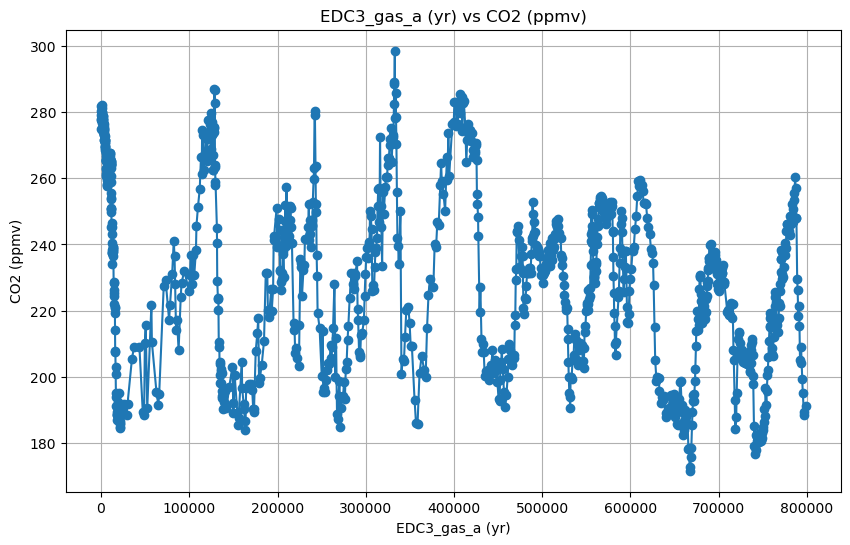

In [10]:
# Plotting EDC3_gas_a (yr) vs CO2 (ppmv)
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(df1['EDC3_gas_a (yr)'], df1['CO2 (ppmv)'], marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('EDC3_gas_a (yr)')
plt.ylabel('CO2 (ppmv)')
plt.title('EDC3_gas_a (yr) vs CO2 (ppmv)')

# Display the plot
plt.grid(True)
plt.show()

Addition of Mono Loa data to bring CO2 records up to present

In [12]:
# read in composite CO2 data from excel
df2 = pd.read_csv('data/co2_annmean_mlo.csv', header=43)

# Convert values of year to EDC3 format
df2['year'] = (df2['year'] - 1950) * -1

# Drop UNC column
del df2['unc']

# Display the data
print(df2)

    year    mean
0     -9  315.98
1    -10  316.91
2    -11  317.64
3    -12  318.45
4    -13  318.99
..   ...     ...
59   -68  408.72
60   -69  411.65
61   -70  414.21
62   -71  416.41
63   -72  418.53

[64 rows x 2 columns]


In [19]:
# Changing column names to match both dataframes
df2.columns = ['EDC3_gas_a (yr)', 'CO2 (ppmv)']

# Merge the two dataframes
merged_df = pd.concat([df2, df1], ignore_index=True)

# Display the data
print(merged_df)

      EDC3_gas_a (yr)  CO2 (ppmv)
0                  -9      315.98
1                 -10      316.91
2                 -11      317.64
3                 -12      318.45
4                 -13      318.99
...               ...         ...
1155           794608      199.40
1156           795202      195.20
1157           796467      189.30
1158           797099      188.40
1159           798512      191.00

[1160 rows x 2 columns]


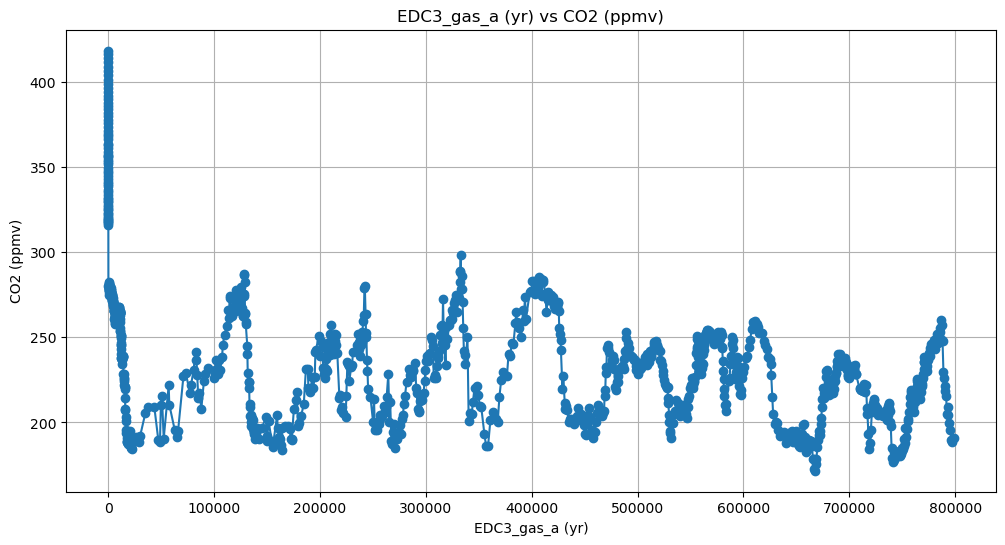

In [22]:
# Plotting EDC3_gas_a (yr) vs CO2 (ppmv)
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.plot(merged_df['EDC3_gas_a (yr)'], merged_df['CO2 (ppmv)'], marker='o', linestyle='-')



# Adding labels and title
plt.xlabel('EDC3_gas_a (yr)')
plt.ylabel('CO2 (ppmv)')
plt.title('EDC3_gas_a (yr) vs CO2 (ppmv)')

# Display the plot
plt.grid(True)
plt.show()

### Temperature 
The temperature dataset used was provided by Lecturer Brian McGinley in txt file format "EPICA Dome C Ice Core 800KYr Deuterium Data and Temperature Estimate 2007.txt" The temperature variable is a measure of deviation from the long term average taken from the last 1000 years. (Jouzel et al., 2007) 

The image below shows the location of the Dome C research facility where the ice core sampling was done to produce the dataset being used.

![Geographical map of Antartica, showing Dome C](https://www.researchgate.net/profile/Margarita-Kallistratova/publication/304375321/figure/download/fig13/AS:391246511132682@1470291845422/Geographical-map-of-Antarctica-with-the-position-of-Dome-C-where-the-French-Italian.png)

In [24]:
# read in temperature from original source "EPICA Dome C..." txt file" 
dfTemperature = pd.read_csv('data/EPICA Dome C Ice Core 800KYr Deuterium Data and Temperature Estimate 2007.txt', sep='\s+', skiprows=91)
dfTemperature.head()

# check for Null entries
print(dfTemperature.isnull().sum()) 
dfTemperature.describe()

# Display dataframe
print(dfTemperature)


Bag             0
ztop            0
Age             0
Deuterium      12
Temperature    15
dtype: int64
       Bag     ztop           Age  Deuterium  Temperature
0        1     0.00     -50.00000        NaN          NaN
1        2     0.55     -43.54769        NaN          NaN
2        3     1.10     -37.41829        NaN          NaN
3        4     1.65     -31.61153        NaN          NaN
4        5     2.20     -24.51395        NaN          NaN
...    ...      ...           ...        ...          ...
5795  5796  3187.25  797408.00000    -440.20        -8.73
5796  5797  3187.80  798443.00000    -439.00        -8.54
5797  5798  3188.35  799501.00000    -441.10        -8.88
5798  5799  3188.90  800589.00000    -441.42        -8.92
5799  5800  3189.45  801662.00000    -440.90        -8.82

[5800 rows x 5 columns]


## References

### Markdown

Stack overflow, 2023
https://stackoverflow.com/questions/15155778/superscript-in-markdown-github-flavored/15156585#15156585


Studylib, 2024
https://studylib.es/doc/8825178/cheatsheet-markdown

### Python

(Pandas, 2014)
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html

### Data Sources

(Bereiter et al., 2014), Revision of the EPICA Dome C CO2 record from 800 to 600 kyr before present, Geophysical Research Letters, doi: 10.1002/2014GL061957.

(Jouzel et al., 2007) Orbital and Millennial Antarctic Climate Variability over the Past 800,000 Years., Science, Vol. 317, No. 5839, pp.793-797, 10 August 2007.